<H1>Лабораторная работа № 4
Аннануров Даниил Петрович ИВТ 1.2

1.1 Написать функцию two_sum, которая возвращает кортеж из двух индексов элементов списка lst, таких что сумма элементов по этим индексам равна переменной target, Элемент по индексу может быть выбран лишь единожды, значения в списке могут повторяться. Если в списке встречается больше чем два индекса, подходящих под условие - вернуть наименьшие из всех. Элементы находятся в списке в произвольном порядке. Алгоритм на двух циклах, сложность O(n2)

In [1]:
def two_sum(lst, target):
    for i in range(len(lst)):
        for j in range(i + 1, len(lst)):
            if lst[i] + lst[j] == target:
                return (i, j)
    return None

lst = [1, 2, 3, 4, 5, 6, 7, 8, 9]
target = 8
result = two_sum(lst, target)

if __name__ == "__main__":
    
    print(result)

    print(two_sum([1, 1, 2, 3], 2))

    assert two_sum(lst, target) == (0, 6)
    assert two_sum([1, 1, 2, 3], 2) == (0, 1)
    assert two_sum(list(range(1000000)), 999999) == (0, 999999)

(0, 6)
(0, 1)


1.2 Усовершенствуйте предыдущую задачу ??, добавив функцию two_sum_hashed(lst, target) так, чтобы сложность алгоритма была ниже: O(n) или O(n · log(n)).

In [2]:
def two_sum_hashed(lst, target):
    numbers_dict = {}
    for i, num in enumerate(lst):
        diff = target - num
        if diff in numbers_dict:
            return (numbers_dict[diff], i)
        numbers_dict[num] = i
    return None
lst = [1, 2, 3, 4, 5, 6, 7, 8, 9]
target = 8
result = two_sum_hashed(lst, target)

if __name__ == "__main__":
    print(result)

(2, 4)


1.3 Усовершенствуйте предыдущую задачу 1.2, добавив функцию , которая возвращает все наборы индексов, удовлетворяющих условию суммы target

In [3]:
def two_sum_hashed_all(lst, target):
    numbers_dict = {}
    result = []
    for i, num in enumerate(lst):
        diff = target - num
        if diff in numbers_dict:
            result.append((numbers_dict[diff], i))
        numbers_dict[num] = i
    return result
lst = [1, 2, 3, 4, 5, 6, 7, 8, 9]
target = 8
result = two_sum_hashed_all(lst, target)

if __name__ == "__main__":
    print(result)


[(2, 4), (1, 5), (0, 6)]


1.4 Повторите или изучите понятие мемоизации в Python. Реализуйте с помощью мемоизации и рекурсии вычисление чисел Фибоначчи сначала рукаки с помощью вручную добавленого к рекурсивной функции словаря с ранее вычисленными числами Фибоначчи, а затем с помощью декоратора @cache из стандартного модуля Python functools.

In [4]:
from functools import cache

@cache
def fibonacci(n):
    if n <= 1:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)
def fibonacci1(n, cache={0: 0, 1: 1}):
    if n in cache:
        return cache[n]
    else:
        result = fibonacci1(n-1, cache) + fibonacci1(n-2, cache)
        cache[n] = result
        return result

print("Рекурсия ручной метод: ",fibonacci1(10))
print("Рекурсия с @ cache: ",fibonacci(10))


Рекурсия ручной метод:  55
Рекурсия с @ cache:  55


2.1 Отправка почты через smtplib.

In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

def send_mail(sender_email, sender_password, receiver_email, subject, message):
    server = smtplib.SMTP('smtp.mail.ru', 587)
    server.starttls()
    
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = receiver_email
    msg['Subject'] = subject
    
    server.login(sender_email, sender_password)
    
    msg.attach(MIMEText(message, 'plain'))
    
    server.send_message(msg)
    
    server.quit()

sender_email = 'daniil.annanurov@mail.ru'
sender_password = 'enjsBQ*******0Y'
receiver_email = 'dan.annanurov@gmail.com'
subject = 'Привет от помощника'
message = 'Привет, это тестовое сообщение.'

send_mail(sender_email, sender_password, receiver_email, subject, message)

*специально стоят звездочки, все работало

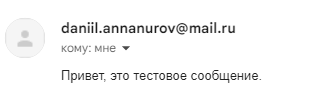

2.2 Парсинг сайта погоды (wheather HTML parsing) на google.com и/или на простом сайте wttr.in с помощью BeautifulSoup (v4).

In [ ]:
import requests
city = 'Санкт-Петербург'
url = 'https://api.openweathermap.org/data/2.5/weather?q='+city+'&units=metric&lang=ru&appid=79d1ca96933b0328e1c7e3e7a26cb347'
weather_data = requests.get(url).json()
temperature = round(weather_data['main']['temp'])
temperature_feels = round(weather_data['main']['feels_like'])
print('Сейчас в городе', city, str(temperature), '°C')
print('Ощущается как', str(temperature_feels), '°C')

Сейчас в городе Санкт-Петербург -3 °C
Ощущается как -7 °C


2.3 С помощью бибилиотеки matplotlib вывести два окна с графиками функций по личному выбору. В одном окне два графика двух разных функций. В другом окне - один график ещё одной функции.

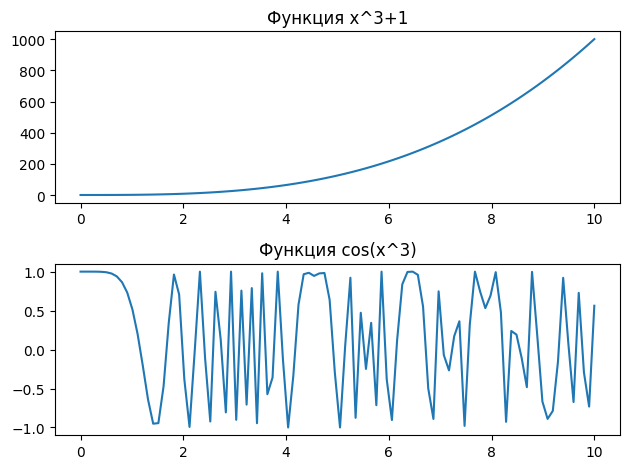

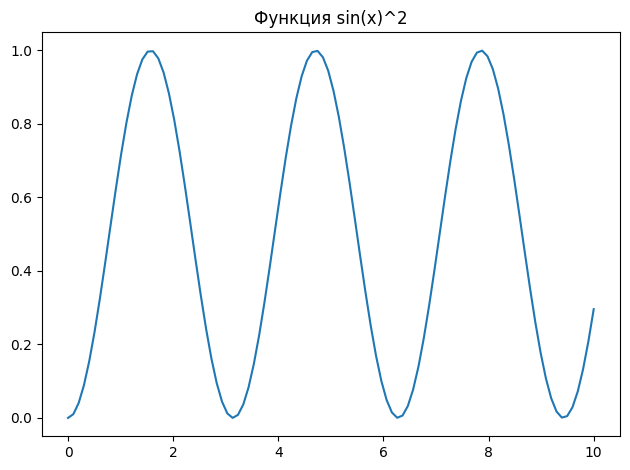

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def function1(x):
    return x**3+1

def function2(x):
    return np.cos(x**3)

def function3(x):
    return np.sin(x)**2

fig1, (ax1, ax2) = plt.subplots(2, 1)

x = np.linspace(0, 10, 100)
ax1.plot(x, function1(x))
ax1.set_title('Функция x^3+1')

ax2.plot(x, function2(x))
ax2.set_title('Функция cos(x^3)')

fig1.tight_layout()
plt.show()

fig2, ax3 = plt.subplots()

ax3.plot(x, function3(x))
ax3.set_title('Функция sin(x)^2')

fig2.tight_layout()
plt.show()